In [63]:
ion1 = -4
ion2 = 4
nions = 13
nseg = 25
file_suffix = "v1"

# Optimizer settings
pitime = 8  # us, corresponds to max rabi frequency per base function
τmin = 5    # min segment length in us
τmax = 15   # max segment length in us
maxtime = 10  # max seconds to run optimization
min_mode_index = 3  # lower bound for detune during gate 
max_mode_index = 4  # max bound for detune during gate 
params_file = "../system_params/072125_goldparams_13ions.json"
println("Gate time between $(τmin * nseg) and $(τmax * nseg) μs")
println("Lower bound on pi time required: $(pitime/cld(nseg+1, 2)) μs")

Gate time between 125 and 375 μs
Lower bound on pi time required: 0.6153846153846154 μs


In [64]:
using GoldGates
using MSSim: Optimizers as Opts, SegSeq as SS, SymLinear as SL, Sequence as Seq, Utils as U
using NLopt
using Statistics
using PyPlot
using JSON
using Dates

include("../src/utils.jl")
ENV["MPLBACKEND"] = "module://matplotlib_inline.backend_inline"

sysparams = open(params_file) do io
    read(io, GoldGates.SystemParams; format=:json)
end

modes = setup_modes(sysparams, ion1, ion2, nions)
nlmodel = setup_model(nseg, modes)
opt, tracker = setup_optimizer(nlmodel, sysparams; pitime, τmin, τmax, maxtime, min_mode_index, max_mode_index)

date = Dates.format(Dates.now(), "yyyymmdd")
out_file = "../out/$(date)_am_$(nions)_$(file_suffix).json"
println("Results will be saved to $out_file")

best_params, best_obj = run_optimization!(opt, tracker, nlmodel)

Results will be saved to ../out/20260208_am_13_v1.json
(obj = 1.1150333837010202e-5, dis = 1.609741144842381e-8, disδ = 0.0011060457089432712, area = 1.5707962912560436, areaε = -3.553885297158388e-8, areaδ = 0.9689976281893102, total_t = 358.56608695643524, Ωmax = 7.235501657416199e-8)
  2.584972 seconds (1.41 M allocations: 76.932 MiB, 0.44% gc time, 13.15% compilation time: 100% of which was recompilation)


([14.34264347825741, 7.235501657416199e-8, 0.0021575810308898397, 0.005970069709974677, 0.011824554720230826, 0.024012242792648297, 0.03681492134433564, 0.052329951229723635, 0.07029747202433764, 0.07787036400051285, 0.08282087182299205, 0.07741486422872479, 0.05578998365388565, 0.03358697933477097, 14.517258149233827], 1.1150333837010202e-5)

All verification checks passed.
Saved solution for ions (-4, 4) to ../out/20260208_am_13_v1.json


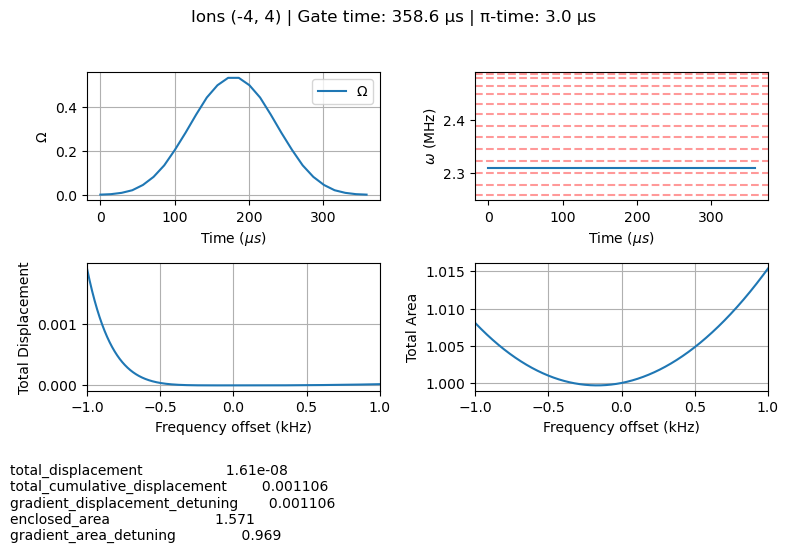

In [65]:
# === Review results & save ===
opt_raw_params, metadata = get_metadata_and_plot(nlmodel, best_params, nseg, sysparams, modes;
    ion1, ion2, pitime, τmin, τmax, maxtime, min_mode_index, max_mode_index)
verify_solution(metadata)
save_am_solution(out_file, opt_raw_params, metadata, sysparams, ion1, ion2)